## 前提
データはここよりダウンロードする。 [ダウンロード先](https://www.bayareabikeshare.com/open-data)  
データは3年分ある。

- station
    - station_id: station ID number (corresponds to "station_id" in "201402_status_data.csv")
    - name: name of station
    - lat: latitude
    - long: longitude
    - dockcount: number of total docks at station
    - landmark: city (San Francisco, Redwood City, Palo Alto, Mountain View, San Jose)
    - installation: date that station was installed 

- status
    - station_id: station ID number (use "201402_station_data.csv" to find corresponding station information)
    - bikes_available: number of available bikes
    - docks_available: number of available docks
    - time: date and time, PST


- trip
    - Trip ID: numeric ID of bike trip
    - Duration: time of trip in seconds
    - Start Date: start date of trip with date and time, in PST
    - Start Station: station name of start station
    - Start Terminal: numeric reference for start station
    - End Date: end date of trip with date and time, in PST
    - End Station: station name for end station
    - End Terminal: numeric reference for end station
    - Bike #: ID of bike used
    - Subscription Type: Subscriber = annual member; Customer = 24-hour or 3-day member
    - Zip Code: Home zip code of user (only available for annual members)

- weather
    - Max_Visibility_Miles 	Note-No local Mountain View historical visibility data- reported from Palo Alto station	
    - Mean_Visibility_Miles 	Note-No local Mountain View historical visibility data- reported from Palo Alto station	
    - Min_Visibility_Miles 	 Note-No local Mountain View historical visibility data- reported from Palo Alto station		
    - Precipitation_In 	"numeric, in form x.xx but alpha ""T""= trace when amount less than .01 inch"	
    - Cloud_Cover 	"scale of 0-8, 0=clear"	
    - Events	"text field - entries: rain, fog, thunderstorm"	
    -zip code: 94107=San Francisco, 94063=Redwood City, 94301=Palo Alto, 94041=Mountain View, 95113= San Jose"	

In [72]:
import pandas as pd

station_df = pd.read_csv("babs_open_data_year_1/201402_babs_open_data/201402_station_data.csv", sep=",")
status_df = pd.read_csv("babs_open_data_year_1/201402_babs_open_data/201402_status_data.csv", sep=",")
trip_df = pd.read_csv("babs_open_data_year_1/201402_babs_open_data/201402_trip_data.csv", sep=",")
weather_df = pd.read_csv("babs_open_data_year_1/201402_babs_open_data/201402_weather_data.csv", sep=",")

In [3]:
station_df.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [88]:
station_df["landmark"].value_counts()

San Francisco    35
San Jose         15
Redwood City      7
Mountain View     7
Palo Alto         5
Name: landmark, dtype: int64

In [4]:
station_df.tail()

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [5]:
station_df.shape

(69, 7)

In [7]:
trip_df.shape

(144015, 11)

In [8]:
status_df.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [16]:
nine_df = status_df[status_df["time"].str.contains('2013/09/01')]

In [21]:
nine_df.head()

,station_id,bikes_available,docks_available,time
3245,2,11,16,2013/09/01 00:00:02
3246,2,11,16,2013/09/01 00:01:02
3247,2,11,16,2013/09/01 00:02:01
3248,2,11,16,2013/09/01 00:03:01
3249,2,11,16,2013/09/01 00:04:01


In [23]:
nine_two_df = nine_df[nine_df["station_id"]==2]

In [25]:
nine_two_df.tail()

,station_id,bikes_available,docks_available,time
4533,2,11,16,2013/09/01 23:55:01
4534,2,11,16,2013/09/01 23:56:03
4535,2,11,16,2013/09/01 23:57:01
4536,2,11,16,2013/09/01 23:58:01
4537,2,12,15,2013/09/01 23:59:01


 ...]

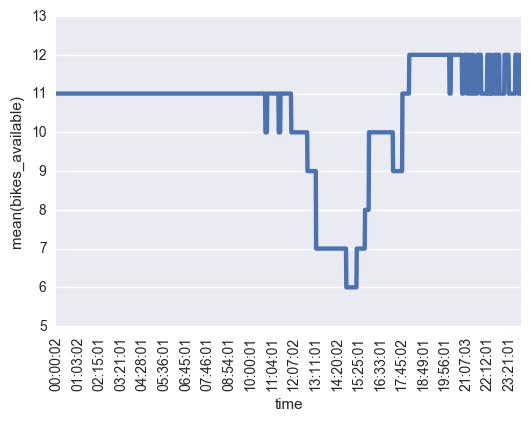

In [48]:
%matplotlib inline
import seaborn as sns
ax = sns.pointplot(
    x='time',   # x軸にDateTime
    y='bikes_available',       # y軸にWatt
    data=nine_two_df,      # DataFrameを指定
    markers=[''])   # dataをplotするマーカーを非表示に

xlabels = [time.split(' ')[1]
    if list(nine_two_df.time).index(time) % 60 is 0 else ''
    for time in nine_two_df.time]

# x軸ラベルを設定＆ラベル表示を90度回転
ax.set_xticklabels(xlabels, rotation='vertical')

In [49]:
trip_df.shape

(144015, 11)

In [51]:
# trip_df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


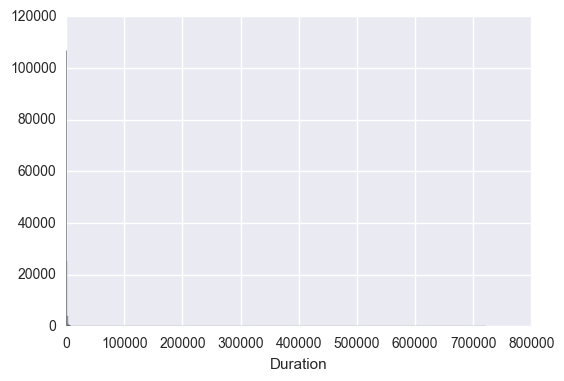

In [14]:
#trip_df["Bike #"].value_counts()
%matplotlib inline
import seaborn as sns

#cx = sns.countplot(x='Duration', data=trip_df)
sns.distplot(trip_df["Duration"], kde=False, rug=False, bins=1000)



In [23]:
#trip_df.sort_values(by=["Duration"], ascending=False)["Duration"]
pd.qcut(trip_df["Duration"], 10).value_counts(sort=False)

[60, 241]         14413
(241, 314]        14561
(314, 383]        14281
(383, 454]        14458
(454, 531]        14414
(531, 617]        14446
(617, 724]        14272
(724, 895]        14371
(895, 1330]       14401
(1330, 722236]    14398
Name: Duration, dtype: int64

In [66]:
pd.qcut(trip_df["Duration"], 10).value_counts(sort=False)

[60, 241]         14413
(241, 314]        14561
(314, 383]        14281
(383, 454]        14458
(454, 531]        14414
(531, 617]        14446
(617, 724]        14272
(724, 895]        14371
(895, 1330]       14401
(1330, 722236]    14398
Name: Duration, dtype: int64

In [73]:
trip_df["Duration"] /= 60

In [74]:
trip_df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,1.050000,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [75]:
sub_df = trip_df[ trip_df["Subscription Type"].str.contains("Subscriber")]

In [76]:
cus_df = trip_df[ trip_df["Subscription Type"].str.contains("Cus")]

In [77]:
pd.qcut(sub_df["Duration"], 10).value_counts(sort=False)

[1, 3.8]                11514
(3.8, 4.817]            11345
(4.817, 5.817]          11418
(5.817, 6.8]            11315
(6.8, 7.85]             11267
(7.85, 9]               11367
(9, 10.317]             11437
(10.317, 11.983]        11279
(11.983, 14.783]        11366
(14.783, 10322.0333]    11339
Name: Duration, dtype: int64

In [78]:
pd.qcut(cus_df["Duration"], 10).value_counts(sort=False)

[1.0167, 6.983]         3039
(6.983, 9.45]           3058
(9.45, 11.817]          3016
(11.817, 14.567]        3039
(14.567, 17.8]          3040
(17.8, 22.0533]         3029
(22.0533, 28.05]        3045
(28.05, 49.8]           3029
(49.8, 126.922]         3036
(126.922, 12037.267]    3037
Name: Duration, dtype: int64

In [79]:
sub_df.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,113647.000000,113647.000000,113647.000000,113647.000000,113647.000000
mean,106806.906130,9.832826,57.195377,57.129761,437.863692
std,54349.232799,46.270395,17.477405,17.472334,136.832563
min,4069.000000,1.000000,2.000000,2.000000,9.000000
25%,61233.500000,5.316667,50.000000,50.000000,350.000000
50%,107004.000000,7.850000,62.000000,61.000000,446.000000
75%,154688.500000,11.083333,70.000000,70.000000,545.000000
max,198775.000000,10322.033333,83.000000,83.000000,717.000000


In [80]:
cus_df.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,30368.000000,30368.000000,30368.000000,30368.000000,30368.000000
mean,79116.721714,60.491994,55.915602,56.246674,433.907238
std,57247.106051,219.705992,16.935782,16.944933,142.593868
min,4078.000000,1.016667,2.000000,2.000000,9.000000
25%,27518.750000,10.616667,48.000000,48.000000,345.000000
50%,65193.000000,17.800000,60.000000,60.000000,444.000000
75%,132178.250000,34.387500,70.000000,70.000000,547.000000
max,198774.000000,12037.266667,83.000000,83.000000,717.000000


In [ ]:
Subscription TypeがSubscriberとCustomerで見てみると


In [69]:
trip_df["Duration"].describe()

count    144015.000000
mean         20.515169
std         110.882705
min           1.000000
25%           5.816667
50%           8.850000
75%          13.283333
max       12037.266667
Name: Duration, dtype: float64

In [ ]:
# SubscriberとCustomerで分ける。時間帯で見る。（朝乗る人多い等）。その際、地区でも分ける。
# San Francisco    35
# San Jose         15
# Redwood City      7
# Mountain View     7
# Palo Alto         5

In [89]:
status_df.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [90]:
status_df.shape

(16994602, 4)

In [93]:
status_df["station_id"].value_counts()

2     260491
3     260490
4     260490
5     260490
6     260490
7     260490
8     260490
34    260489
28    260489
29    260489
30    260489
33    260489
38    260489
35    260489
36    260489
37    260489
26    260489
39    260489
27    260489
22    260489
25    260489
24    260489
23    260489
45    260489
21    260489
16    260489
14    260489
13    260489
12    260489
11    260489
       ...  
63    260489
46    260489
60    260489
59    260489
58    260489
57    260489
61    260489
55    260489
54    260489
51    260489
50    260489
49    260489
48    260489
47    260489
67    260488
71    260488
76    260488
75    260488
74    260488
73    260488
72    260488
77    260488
70    260488
69    260488
68    260488
32     85730
31     85583
80     85482
82     54298
83     12216
Name: station_id, dtype: int64

In [96]:
station_df.tail()

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014
